In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest,chi2
from sklearn import set_config
import seaborn as sns 
import matplotlib.pyplot as plt

In [47]:
set_config(display='diagram')

In [48]:
df=pd.read_csv("./datasets/data_science_job.csv")

In [49]:
df.sample(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
15494,29680,city_103,0.920,Male,No relevent experience,Full time course,High School,NaN,2.0,500-999,Pvt Ltd,28.0,1.0
10483,2992,city_173,0.878,Male,Has relevent experience,Full time course,Masters,STEM,5.0,100-500,NGO,26.0,0.0
1886,27875,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,<10,Early Stage Startup,89.0,0.0
7667,18088,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Arts,1.0,<10,Early Stage Startup,5.0,0.0
2118,13121,city_160,NaN,NaN,Has relevent experience,no_enrollment,Graduate,STEM,14.0,<10,Pvt Ltd,90.0,0.0
5966,15249,city_149,0.689,Male,No relevent experience,Full time course,Graduate,Other,3.0,50-99,Pvt Ltd,34.0,0.0
15253,14680,city_21,0.624,Male,No relevent experience,no_enrollment,NaN,NaN,3.0,NaN,NaN,NaN,0.0
1174,31579,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,Other,20.0,500-999,Pvt Ltd,61.0,0.0
4200,6042,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,No Major,20.0,1000-4999,NGO,83.0,0.0
10183,2884,city_40,0.776,NaN,Has relevent experience,Full time course,Graduate,STEM,10.0,50-99,Pvt Ltd,33.0,1.0


In [50]:
df = df.drop('city', axis=1)


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city_development_index  18679 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  float64
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  training_hours          18392 non-null  float64
 11  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.8+ MB


In [52]:
df["gender"]

0        Male
1        Male
2         NaN
3         NaN
4        Male
         ... 
19153    Male
19154    Male
19155    Male
19156    Male
19157     NaN
Name: gender, Length: 19158, dtype: object

In [53]:
col=[]
for c in df.columns:
    if df[c].isnull().mean()<0.05 and df[c].isnull().mean()>0:
        col.append(c)

In [54]:
col

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [55]:
new_df=df.dropna(subset=col)


In [56]:
df.shape,new_df.shape

((19158, 12), (17182, 12))

In [57]:
new_df.head()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
4,666,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
5,21651,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11.0,NaN,NaN,24.0,1.0


# Data analysis in case of CCAR

In [58]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17182 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             17182 non-null  int64  
 1   city_development_index  17182 non-null  float64
 2   gender                  13309 non-null  object 
 3   relevent_experience     17182 non-null  object 
 4   enrolled_university     17182 non-null  object 
 5   education_level         17182 non-null  object 
 6   major_discipline        15029 non-null  object 
 7   experience              17182 non-null  float64
 8   company_size            12064 non-null  object 
 9   company_type            11890 non-null  object 
 10  training_hours          17182 non-null  float64
 11  target                  17182 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.7+ MB


In [59]:
new_df.isnull().sum()
# city ,relevent_experience,enrolled_university,education_level

enrollee_id                  0
city_development_index       0
gender                    3873
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline          2153
experience                   0
company_size              5118
company_type              5292
training_hours               0
target                       0
dtype: int64

In [60]:
df["relevent_experience"].value_counts(),df["relevent_experience"].nunique()
# ["No relevent experience","Has relevent experience"],4

(Has relevent experience    13792
 No relevent experience      5366
 Name: relevent_experience, dtype: int64,
 2)

In [61]:
df["enrolled_university"].value_counts(),df["enrolled_university"].nunique()
# ["no_enrollment,Part time course","Full time course"],5

(no_enrollment       13817
 Full time course     3757
 Part time course     1198
 Name: enrolled_university, dtype: int64,
 3)

In [62]:
df["education_level"].value_counts(),df["education_level"].nunique()
# ["Primary School","High School","Graduate","Masters","Phd"], 6

(Graduate          11598
 Masters            4361
 High School        2017
 Phd                 414
 Primary School      308
 Name: education_level, dtype: int64,
 5)

"gender"  --> one_hot_coding

"major_discipline"  -->ordinal encoding

"company_size"   -->  ordinal encoding

"company_type"  ---> ordinal_encoding

"relevent_experience" -->ordinal_encoding

"enrolled_university"  -->ordinal encoding
"education_level"      --> ordinal encoding



In [63]:
new_df["gender"].value_counts(), df["gender"].nunique()

(Male      12006
 Female     1142
 Other       161
 Name: gender, dtype: int64,
 3)

In [64]:
new_df["major_discipline"].value_counts(),df["major_discipline"].nunique()
# "STEM","Humanities","Business Degree","Arts","Other","No Major"

(STEM               13314
 Humanities           617
 Other                347
 Business Degree      308
 Arts                 234
 No Major             209
 Name: major_discipline, dtype: int64,
 6)

In [65]:
new_df["company_size"].value_counts(), df["company_size"].nunique()
# "<10","10/49","50-99","100-500","500-999","1000-4999","5000-9999","10000+"

(50-99        2802
 100-500      2330
 10000+       1863
 10/49        1342
 1000-4999    1215
 <10          1185
 500-999       807
 5000-9999     520
 Name: company_size, dtype: int64,
 8)

In [66]:
new_df["company_type"].value_counts(), df["company_type"].nunique()
# "Pvt Ltd","Public Sector","Funded Startup","Early Stage Startup","NGO","Other"

(Pvt Ltd                8970
 Funded Startup          922
 Public Sector           867
 Early Stage Startup     552
 NGO                     470
 Other                   109
 Name: company_type, dtype: int64,
 6)

# Comparision between Dataset after removing of "NULL value" and Without removing of the NULL value

##### Here we will show pdf for the numerical data and for categorical data, we will show ratio after the deletion and before the deletion

In [67]:
col

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

city_development_index --> numerical (PDF)
enrolled_university    -->Categorical(Ratio)
education_level        -->Categorical(Ratio)
experience             -->Numerical (PDF)
training_hours         -->Numerical (PDF)

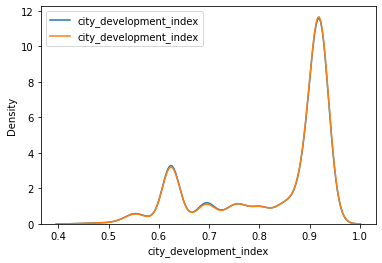

In [68]:
sns.kdeplot(df["city_development_index"],label="city_development_index")
sns.kdeplot(new_df["city_development_index"],label="city_development_index")
plt.legend()
plt.show()

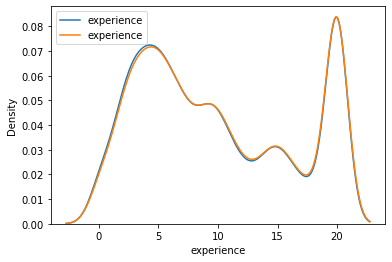

In [69]:
sns.kdeplot(df["experience"],label="experience")
sns.kdeplot(new_df["experience"],label="experience")
plt.legend()
plt.show()

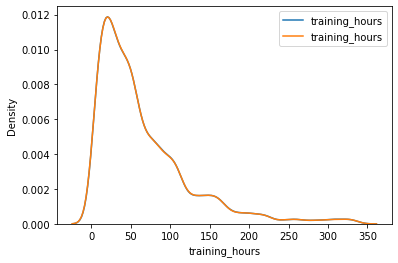

In [70]:
sns.kdeplot(df["training_hours"],label="training_hours")
sns.kdeplot(new_df["training_hours"],label="training_hours")
plt.legend()
plt.show()

In [71]:
temp=pd.concat(
    [df["enrolled_university"].value_counts()/len(df),
    new_df["enrolled_university"].value_counts()/len(new_df)], axis=1
    
)
temp

,enrolled_university,enrolled_university
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [72]:
temp=pd.concat(
    [df["education_level"].value_counts()/len(df),
    new_df["education_level"].value_counts()/len(new_df)], axis=1
    
)
temp

,education_level,education_level
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


# Train with Complete Case At Random(CCAR)

In [73]:
X_train,X_test,y_train,y_test=train_test_split(new_df.iloc[:,:11],new_df.iloc[:,11:12])

In [74]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((12886, 11), (4296, 11), (12886, 1), (4296, 1))

In [75]:
X_train.columns

Index(['enrollee_id', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'training_hours'],
      dtype='object')

In [76]:
X_train.isnull().sum()

enrollee_id                  0
city_development_index       0
gender                    2879
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline          1629
experience                   0
company_size              3827
company_type              3960
training_hours               0
dtype: int64

In [77]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12886 entries, 17918 to 5804
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             12886 non-null  int64  
 1   city_development_index  12886 non-null  float64
 2   gender                  10007 non-null  object 
 3   relevent_experience     12886 non-null  object 
 4   enrolled_university     12886 non-null  object 
 5   education_level         12886 non-null  object 
 6   major_discipline        11257 non-null  object 
 7   experience              12886 non-null  float64
 8   company_size            9059 non-null   object 
 9   company_type            8926 non-null   object 
 10  training_hours          12886 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 1.2+ MB


In [78]:
X_train["enrollee_id"].nunique()

12886

In [79]:
X_train.describe()

,enrollee_id,city_development_index,experience,training_hours
count,12886.000000,12886.000000,12886.000000,12886.000000
mean,16864.820658,0.831614,10.038026,65.261990
std,9639.122214,0.122116,6.507721,59.770728
min,2.000000,0.448000,0.000000,1.000000
25%,8504.250000,0.743000,4.000000,23.000000
50%,16996.000000,0.910000,9.000000,47.000000
75%,25227.500000,0.920000,16.000000,88.000000
max,33380.000000,0.949000,20.000000,336.000000


In [80]:
y_train.isnull().sum()

target    0
dtype: int64

In [81]:
trf1=ColumnTransformer(transformers=[
    ('impute',SimpleImputer(strategy="most_frequent"),[2,6,8,9])
]
,remainder="passthrough")

In [82]:
trf2=ColumnTransformer(transformers=[
    ('gender',OneHotEncoder(sparse=False,handle_unknown="ignore"),[2]),
#     ('major_discipline_company_size_company_type', OrdinalEncoder(categories=[["STEM","Humanities","Business Degree","Arts","Other","No Major"],
#                                                                               ["<10","10/49","50-99","100-500","500-999","1000-4999","5000-9999","10000+"],
#                                                                               ["Pvt Ltd","Public Sector","Funded Startup","Early Stage Startup","NGO","Other"],
#                                                                               ["No relevent experience","Has relevent experience"],
#                                                                               ["no_enrollment","Part time course","Full time course"],
#                                                                               ["Primary School","High School","Graduate","Masters","Phd"]],handle_unknown="use_encoded_value",unknown_value=-1)
#                                                                                 ,[6,8,9,3,4,5])
    ('major_discipline', OrdinalEncoder(categories=[["STEM","Humanities","Business Degree","Arts","Other","No Major"]],handle_unknown='use_encoded_value', unknown_value=-1),[6]),
    ('company_size', OrdinalEncoder(categories=[["<10","10/49","50-99","100-500","500-999","1000-4999","5000-9999","10000+"]],handle_unknown='use_encoded_value', unknown_value=-1),[8]),
    ('company_type', OrdinalEncoder(categories=[['Pvt Ltd','Public Sector','Funded Startup','Early Stage Startup','NGO","Other']],handle_unknown='use_encoded_value', unknown_value=-1),[9]),
    ('relevent_experience',OrdinalEncoder(categories=[["No relevent experience","Has relevent experience"]],handle_unknown='use_encoded_value', unknown_value=-1),[3]),
    ('enrolled_university', OrdinalEncoder(categories=[["no_enrollment","Part time course","Full time course"]],handle_unknown='use_encoded_value', unknown_value=-1),[4]),
    ('education_level', OrdinalEncoder(categories=[["Primary School","High School","Graduate","Masters","Phd"]],handle_unknown='use_encoded_value', unknown_value=-1),[5])
],

remainder="passthrough")

In [83]:
# trf2=ColumnTransformer(transformers=[
#     ('gender',OneHotEncoder(sparse=False,handle_unknown="ignore"),[2]),
#     ('major_discipline_company_size_company_type', OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1)
#                                                                                 ,[6,8,9,3,4,5])
# #     ('major_discipline', OrdinalEncoder(categories=[["STEM","Humanities","Business Degree","Arts","Other","No Major"]],handle_unknown='use_encoded_value', unknown_value=-1),[6]),
# #     ('company_size', OrdinalEncoder(categories=[["<10","10/49","50-99","100-500","500-999","1000-4999","5000-9999","10000+"]],handle_unknown='use_encoded_value', unknown_value=-1),[8]),
# #     ('company_type', OrdinalEncoder(categories=[['Pvt Ltd','Public Sector','Funded Startup','Early Stage Startup','NGO","Other']],handle_unknown='use_encoded_value', unknown_value=-1),[9]),
# #     ('relevent_experience',OrdinalEncoder(categories=[["No relevent experience","Has relevent experience"]],handle_unknown='use_encoded_value', unknown_value=-1),[3]),
# #     ('enrolled_university', OrdinalEncoder(categories=[["no_enrollment","Part time course","Full time course"]],handle_unknown='use_encoded_value', unknown_value=-1),[4]),
# #     ('education_level', OrdinalEncoder(categories=[["Primary School","High School","Graduate","Masters","Phd"]],handle_unknown='use_encoded_value', unknown_value=-1),[5])
# ],

# remainder="passthrough")

In [84]:
trf3=ColumnTransformer(transformers=[
    ('scale',MinMaxScaler(),slice(0,13))
])

In [85]:
trf4=SelectKBest(score_func=chi2,k=5)

In [86]:
trf5=DecisionTreeClassifier()

In [87]:
pipe=Pipeline([('trf1',trf1),('trf2',trf2),('trf3',trf3),('trf4',trf4),('trf5',trf5)])

In [88]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [2, 6, 8, 9])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [2]),
                                                 ('major_discipline',
                                                  OrdinalEncoder(categories=[['STEM',
                                                                              'Humanities',
                                                                              'Busine...
                                                 ('education_level',
                                                  OrdinalEncoder(categories=[['Primary '
                                                                              'School',
                                                                              'High '
                                                                              'School',
                                                                              'Graduate',
                                                                              'Masters',
                                                                              'Phd']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [5])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 13, None))])),
                ('trf4',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x7f10cedb8e50>)),
                ('trf5', DecisionTreeClassifier())])

In [89]:
y_pred=pipe.predict(X_test)

In [90]:
accuracy_score(y_pred,y_test)

0.7441806331471136

# Cross_validation_score

In [91]:
cross_val_score(pipe,X_train,y_train,cv=4,scoring="accuracy").mean()

0.7543070180155023

# GridSearch using pipeline

In [92]:
params={
    'trf5__max_depth':[1,2,3,4,5,None]
}

In [93]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(pipe,params,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [2, 6,
                                                                          8,
                                                                          9])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('gender',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         [2]),
                                                                        ('major_discipline',
                                                                         OrdinalEncoder(categories=[...
                                                                                                     'School',
                                                                                                     'Graduate',
                                                                                                     'Masters',
                                                                                                     'Phd']],
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         [5])])),
                                       ('trf3',
                                        ColumnTransformer(transformers=[('scale',
                                                                         MinMaxScaler(),
                                                                         slice(0, 13, None))])),
                                       ('trf4',
                                        SelectKBest(k=5,
                                                    score_func=<function chi2 at 0x7f10cedb8e50>)),
                                       ('trf5', DecisionTreeClassifier())]),
             param_grid={'trf5__max_depth': [1, 2, 3, 4, 5, None]},
             scoring='accuracy')

In [94]:
grid.best_score_

0.7543070180112729

In [95]:
grid.best_params_

{'trf5__max_depth': 1}